In [1]:
from scipy.fft import fft, ifft
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

ValueError: x and y must have same first dimension, but have shapes (800,) and (10, 800, 2)

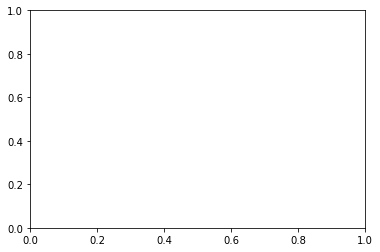

In [23]:
# Number of sample points
N = 800
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
y = np.random.randn(10,N,2)
plt.plot(x,y)

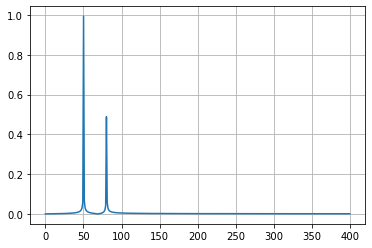

In [4]:
def plot_spect(x,T):
    N=x.shape[-1]
    freqs = np.linspace(0.0, 1.0/(2.0*T), N//2)
    plt.plot(freqs, 2.0/N * np.abs(fft(x)[0:N//2]))
    plt.grid()
    plt.show()
plot_spect(y,T)

In [26]:
from scipy.fft import fft, ifft
axis=-1
Fx = fft(y,axis=axis)
#plt.plot(np.abs(Fx))

In [33]:
H=np.abs(Fx)
ax = tuple(range(Fx.ndim+axis))
print("{}".format(ax))

(0, 1)


In [34]:
if Fx.ndim+axis > 0:
    H = np.mean(H,axis=ax) # grand average spectrum (freq,d)

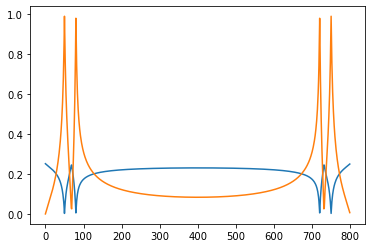

In [7]:
# compute *regularized* whitener (so don't amplify low power noise components)
reg=.01
W = 1./(H+np.max(H)*reg)
plt.plot(W); plt.plot(H*W)

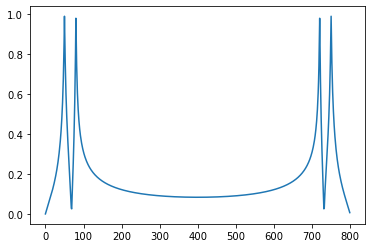

In [8]:
# apply the whitener
Fx = Fx * W 
plt.plot(np.abs(Fx))

In [9]:
# map back to time-domain
wX = np.real(ifft(Fx,axis=axis))

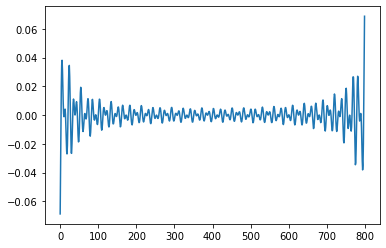

In [10]:
plt.plot(wX)

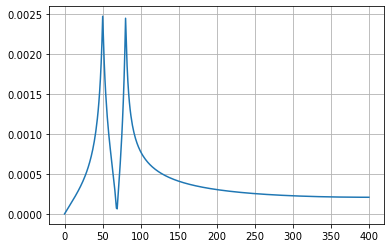

In [11]:
plot_spect(wX,T)

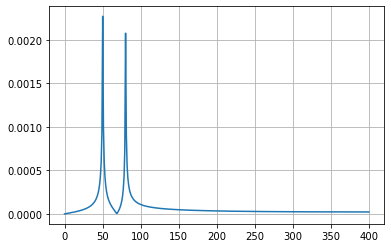

In [20]:
from mindaffectBCI.decoder.preprocess import spectrally_whiten
wy,W=spectrally_whiten(y,axis=-1,reg=.1)
plot_spect(wy,T)

In [21]:
y=np.random.randn(2,100,2)
wy,W=spectrally_whiten(y,axis=-2,reg=.1)

TypeError: tuple indices must be integers or slices, not list